In [0]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving telecom_churn.csv to telecom_churn.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['telecom_churn.csv']))

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
print(df.shape)

(3333, 20)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [0]:
# Изменим тип колонки Churn на числовой

df['Churn'] = df['Churn'].astype('int64')

In [8]:
# Выделим категориальные признаки

object_cols = list(df.select_dtypes(include='object').columns)
object_cols

['State', 'International plan', 'Voice mail plan']

In [0]:
# Напишем функцию для применения one-hot encoding к этим признакам

def one_hot_encoding(train, col):
  dummies = pd.get_dummies(train[col], prefix=col, dummy_na=False)
  return dummies

In [10]:
# Выведем степень оттока пользователй по штатам

df.groupby(['State'])['Churn'].agg(['count'])

,count
State,
AK,52
AL,80
AR,55
AZ,64
CA,34
CO,66
CT,74
DC,54
DE,61


In [11]:
# Посмотрим, какой отток в среднем по штатам, минимальное и максимальное значение

agg = df.groupby(['State'])['Churn'].agg(['count'])
print("min={}".format(agg.min()))
print("max={}".format(agg.max()))
print("mean={}".format(agg.mean()))

min=count    34
dtype: int64
max=count    106
dtype: int64
mean=count    65.352941
dtype: float64


In [0]:
# Разобъем штаты на категории по оттоку: (30,50), (50,70), (70,90), (90,110)

def encode_state(states, count_range):
  res = []
  for state in states:
    if agg['count'][state] in count_range:
      res.append(1)
    else:
      res.append(0)

  return res

In [0]:
df['State_1'] = encode_state(df['State'].values, range(30,50))
df['State_2'] = encode_state(df['State'].values, range(50,70))
df['State_3'] = encode_state(df['State'].values, range(70,90))
df['State_4'] = encode_state(df['State'].values, range(90,110))

In [14]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_1,State_2,State_3,State_4
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,1,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,1,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,0,0


In [15]:
# Проверим, какие значения есть в International plan

df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [16]:
# Приведем International plan к числовому виду

d = {'No' : 0, 'Yes' : 1}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_1,State_2,State_3,State_4
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,1,0
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,1,0
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,1,0,0
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,1,0
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,0,0


In [17]:
# Проверим, какие значения есть в 'Voice mail plan'

df['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

In [18]:
df['Voice mail plan'] = df['Voice mail plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_1,State_2,State_3,State_4
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,1,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,1,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,0,0


In [19]:
# Проверим, какие значения есть в 'Area code'

df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

In [20]:
# Применяем one_hot_encoding к 'Area code'

ac_dummies = one_hot_encoding(df, 'Area code')
ac_dummies

,Area code_408,Area code_415,Area code_510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
3328,0,1,0
3329,0,1,0
3330,0,0,1
3331,0,0,1


In [21]:
df = pd.concat([df, ac_dummies], axis=1)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_1,State_2,State_3,State_4,Area code_408,Area code_415,Area code_510
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,1,0,0,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,1,0,0,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,1,0,0,0,1,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,1,0,1,0,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,0,0,0,1,0


In [0]:
# Опишем функцию для проверки распределения данных

%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.stats import normaltest
import matplotlib.pyplot as plt

def analyze(data):
  plt.style.use('ggplot')
  np.var(data)
  plt.hist(data, bins=60)
  print("mean : ", np.mean(data))
  print("var  : ", np.var(data))
  print("skew : ", skew(data))
  print("kurt : ", kurtosis(data))
  print("shapiro : ", shapiro(data))
  print("normaltest : ", normaltest(data))

In [0]:
# Стандартизируем данные

columns = ['Account length','Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']

In [0]:
df_temp = df[columns]

from sklearn.preprocessing import StandardScaler # MinMaxScaler RobustScaler
scaler = StandardScaler()
scaler.fit(df_temp)

df_temp_prep = scaler.transform(df_temp)
df[columns] = df_temp_prep

In [0]:
# Опишем функцию для нормализации данных
# Используем тест Шапиро и выбираем наилучший результат

from sklearn.preprocessing import PowerTransformer

def normalize(data, train):
  tests = [[data, shapiro(data)]]

  box_cox_transform = PowerTransformer(method='box-cox', standardize=False) # only works with strictly positive values
  yeo_johnson_transform = PowerTransformer(method='yeo-johnson', standardize=False) # works with positive and negative values

  box_cox = data
  if (data.values.min() > 0):
    box_cox = box_cox_transform.fit_transform(data.values.reshape(train.shape[0],-1))
  yeo_johnson = yeo_johnson_transform.fit_transform(data.values.reshape(train.shape[0],-1))
  log = np.log(data.values.reshape(train.shape[0],-1))

  tests.append([box_cox,shapiro(box_cox)])
  tests.append([yeo_johnson,shapiro(yeo_johnson)])
  tests.append([log,shapiro(log)])

  res = tests[0]
  for i in range(1,len(tests)-1):
    if tests[i][1][1] > res[1][1]:
      res = tests[i]
  
  return res[0]

In [0]:
# Опишем функцию для выборки данных, далеких от нормальных

def get_not_normalized(data, threshold):
  res = []
  for col in data.columns:
    if shapiro(data[col])[1] < threshold:
      res.append(col)

  return res

In [34]:
# Выбираем данные, далекие от нормальных

not_norm_columns = get_not_normalized(df[columns], 0.8)
not_norm_columns

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [35]:
# Пробуем нормализовать данные, далекие от нормальных

for col in not_norm_columns:
  df[col] = normalize(df[col], df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14:

In [25]:
# Подгатавливаем данные для обучения модели

from sklearn.model_selection import train_test_split
cols = columns + ['State_1', 'State_2', 'State_3', 'State_4', 'Area code_408', 'Area code_415', 'Area code_510']
print(cols)

['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'State_1', 'State_2', 'State_3', 'State_4', 'Area code_408', 'Area code_415', 'Area code_510']


In [0]:
X = df[cols].values
Y = df['Churn'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(2666, 22) (2666,)
(667, 22) (667,)


In [0]:
from sklearn.model_selection import GridSearchCV

# Функция для поиска лучших параметров модели
def gridSearchResults(classifier, grid_params, x, y):
  gs = GridSearchCV(
      classifier,
      grid_params,
      verbose = 1,
      cv = 3,
      n_jobs = -1
  )

  gsResults = gs.fit(x, y)
  print("Best Score: {}".format(gsResults.best_score_))
  print("Best Estimator: {}".format(gsResults.best_estimator_))
  print("Best Params: {}".format(gsResults.best_params_))

  return gsResults.best_params_

In [0]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, precision_score, auc, roc_auc_score
import matplotlib.pyplot as plt

# функция для анализа модели
def value_of_metrics(y_true, y_pred):
    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Recall: ', recall_score(y_true, y_pred))
    print('Precision: ', precision_score(y_true, y_pred))  
    print('F1: ', f1_score(y_true, y_pred))
    print('Roc_AUC: ', roc_auc_score(y_true, y_pred))
    
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('My DataSet')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
def test_model(model, X_train, Y_train, Y_test):
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  value_of_metrics(Y_test, Y_pred)

In [38]:
# Находим оптимальные параметры модели

from sklearn.ensemble import RandomForestClassifier

grid_params = {
    'n_estimators': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'criterion': ['gini','entropy'],
    'max_depth': [3,4,5,6,7,8,9,10]
}
gridSearchResults(RandomForestClassifier(),grid_params,X_train, Y_train)

Fitting 3 folds for each of 304 candidates, totalling 912 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.6s


Best Score: 0.9148543932008498
Best Estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=14,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Params: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 14}


[Parallel(n_jobs=-1)]: Done 912 out of 912 | elapsed:   29.1s finished


{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 14}

Accuracy:  0.9100449775112444
Recall:  0.48514851485148514
Precision:  0.8596491228070176
F1:  0.620253164556962
Roc_AUC:  0.7355071196165552


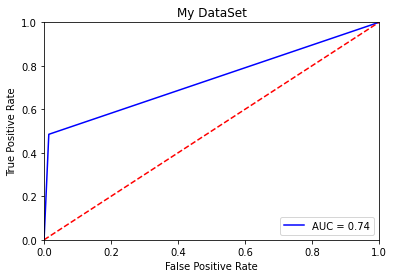

In [41]:
# Тестируем модель

model = RandomForestClassifier(criterion = 'entropy', max_depth = 9, n_estimators = 14)
test_model(model, X_train, Y_train, Y_test)

Используем техники изменения объемов выборок

Добавляем копии объеков миноритарного класса

In [55]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [0]:
from sklearn.utils import resample

X = df[cols].values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [57]:
X = pd.concat([df[cols], df['Churn']], axis=1)
X.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,State_1,State_2,State_3,State_4,Area code_408,Area code_415,Area code_510,Churn
0,0.667251,1.234883,1.577931,0.481544,1.578208,-0.070587,-0.055903,-0.070404,0.866043,-0.466699,0.865333,-0.084631,-0.710228,-0.085307,-0.481694,0,0,1,0,0,1,0,0
1,0.148546,1.307948,-0.333082,1.148263,-0.333356,-0.108027,0.145113,-0.107497,1.057568,0.147692,1.058390,1.303500,-0.710228,1.304264,-0.481694,0,0,1,0,0,1,0,0
2,0.886928,-0.591760,1.174973,0.685395,1.175137,-1.565331,0.498904,-1.565853,-0.757416,0.198699,-0.756114,0.725520,0.198632,0.719210,-1.575257,0,1,0,0,0,1,0,0
3,-0.432591,-0.591760,2.216493,-1.430081,2.216666,-2.722298,-0.604352,-2.722721,-0.078558,-0.569461,-0.078813,-1.238481,0.802215,-1.241551,0.303322,0,0,1,0,1,0,0,0
4,-0.663477,-0.591760,-0.239741,0.634314,-0.239692,-1.035052,1.109982,-1.034070,-0.276394,1.062300,-0.276644,-0.049056,-0.710228,-0.045773,0.853523,0,1,0,0,0,1,0,0


In [58]:
not_churn = X[X.Churn==0]
churn = X[X.Churn==1]

churn_upsampled = resample(churn,
                          replace=True,
                          n_samples=len(not_churn), 
                          random_state=27)


upsampled = pd.concat([not_churn, churn_upsampled])

upsampled.Churn.value_counts()

1    2850
0    2850
Name: Churn, dtype: int64

In [0]:
y_train = upsampled.Churn.values
X_train = upsampled.drop('Churn', axis=1).values

In [61]:
# Находим оптимальные параметры модели

gridSearchResults(RandomForestClassifier(),grid_params,X_train,y_train)

Fitting 3 folds for each of 304 candidates, totalling 912 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   32.2s


Best Score: 0.932280701754386
Best Estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Params: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 16}


[Parallel(n_jobs=-1)]: Done 912 out of 912 | elapsed:   44.6s finished


{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 16}

Accuracy:  0.9856115107913669
Recall:  0.9333333333333333
Precision:  0.9514563106796117
F1:  0.9423076923076923
Roc_AUC:  0.9632373113854595


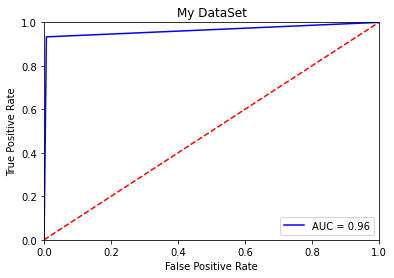

In [62]:
upsampled = RandomForestClassifier(criterion = 'gini', max_depth = 10, n_estimators = 16)
test_model(upsampled, X_train, y_train, y_test)

Уменьшаем количество объектов мажоритарного класс

In [63]:
not_churn_downsampled = resample(not_churn,
                                replace = False, 
                                n_samples = len(churn), 
                                random_state = 27)
downsampled = pd.concat([not_churn_downsampled, churn])
downsampled.Churn.value_counts()

1    483
0    483
Name: Churn, dtype: int64

In [0]:
y_train = downsampled.Churn.values
X_train = downsampled.drop('Churn', axis=1).values

In [65]:
# Находим оптимальные параметры модели

gridSearchResults(RandomForestClassifier(),grid_params,X_train,y_train)

Fitting 3 folds for each of 304 candidates, totalling 912 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.3s


Best Score: 0.7805383022774328
Best Estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=14,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 14}


[Parallel(n_jobs=-1)]: Done 912 out of 912 | elapsed:   18.8s finished


{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 14}

Accuracy:  0.8764988009592326
Recall:  0.9047619047619048
Precision:  0.5053191489361702
F1:  0.6484641638225257
Roc_AUC:  0.8885949441504997


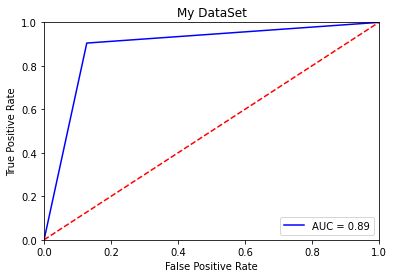

In [67]:
undersampled = RandomForestClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 14)
test_model(undersampled, X_train, y_train, y_test)

Синтетическое увеличение миноритарного класса

SMOTE: Synthetic Minority Oversampling Technique

In [68]:
!pip3 install imblearn

In [69]:
from imblearn.over_sampling import SMOTE

X = df[cols].values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [70]:
# Находим оптимальные параметры модели

gridSearchResults(RandomForestClassifier(),grid_params,X_train,y_train)

Fitting 3 folds for each of 304 candidates, totalling 912 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 909 out of 912 | elapsed:   44.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 912 out of 912 | elapsed:   45.0s finished


Best Score: 0.9193776520509194
Best Estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Params: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 16}


{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 16}

Accuracy:  0.919664268585132
Recall:  0.6
Precision:  0.7159090909090909
F1:  0.6528497409326425
Roc_AUC:  0.7828532235939644


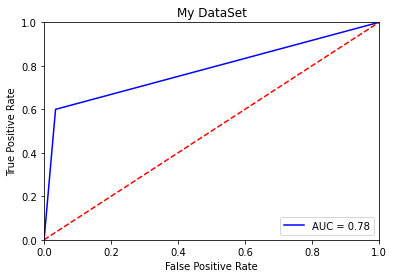

In [71]:
smote = RandomForestClassifier(criterion = 'gini', max_depth = 10, n_estimators = 16)
test_model(smote, X_train, y_train, y_test)

Вывод: RandomTreeClassifier с применением техники Oversampling показал лучший результат.

In [0]:
Y_pred = upsampled.predict(X)

# Подготавливаем файл для Kaggle
res=pd.DataFrame()
res['Churn'] = Y_pred
res.to_csv("res.csv",index=False)

In [0]:
from google.colab import files
files.download('res.csv') 